<a href="https://colab.research.google.com/github/sahil301290/TSS2022-ThaparSummerSchool/blob/main/29Jun2022_Face_Age_Gender_Expression_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DeepFace - Age, Gender, Expression, Headpose and Recognition**

---


In this lesson, we use the **DeepFace API for Age, Gender, Expression Facial and Recognition. We even use the headpose library to obtain head direction/tilt**. DeepFace is an easy to use python module that provides access to several Facial Detection and Recognition models. It's very simple to use to let's dive in.

1. Install the necessary modules and download our files
2. Demonstrate facial landmarks
3. Obtain Age, Gender, Emotional Expression and Ethnicity using DeepFace
4. Perform Facial Similarity
5. Perform Facial Recognition


**NOTE** Change to High-RAM setting.

## **1. Install the necessary modules and download our files**

In [1]:
!pip install deepface
!pip install dlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#### **Define our imshow function**

In [2]:
# Some imports and our image viewing function
import dlib
import tarfile
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 6):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

In [3]:
# Download facial landmarks
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/shape_predictor_68_face_landmarks.dat

--2022-06-23 09:50:39--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/shape_predictor_68_face_landmarks.dat
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 52.95.150.186
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|52.95.150.186|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99693937 (95M) [application/x-www-form-urlencoded]
Saving to: ‘shape_predictor_68_face_landmarks.dat.1’

shape_predictor_68_ 100%[===================>]  95.08M  24.2MB/s    in 3.9s    

2022-06-23 09:50:44 (24.2 MB/s) - ‘shape_predictor_68_face_landmarks.dat.1’ saved [99693937/99693937]



####Getting Test Images and Test Pic

In [4]:
!unzip face_recognition.zip

Archive:  face_recognition.zip
replace face_recognition/Friends.mp4? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


## **2. Demonstrate facial landmarks**

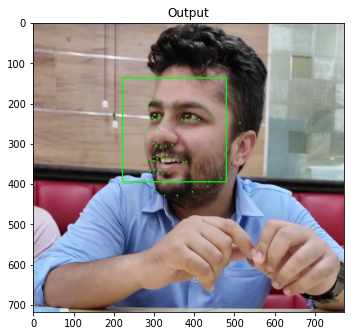

In [5]:
from imutils import face_utils

p = "shape_predictor_68_face_landmarks.dat"
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(p)

image = cv2.imread('sahil1.JPG')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
# Get faces 
rects = detector(gray, 0)

# For each detected face, find the landmark.
for (i, rect) in enumerate(rects):
    # Make the prediction and transfom it to numpy array
    shape = predictor(gray, rect)
    shape = face_utils.shape_to_np(shape)
    (x, y, w, h) = face_utils.rect_to_bb(rect)
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    # Draw on our image, all the finded cordinate points (x,y) 
    for (x, y) in shape:
        cv2.circle(image, (x, y), 2, (0, 255, 0), -1)

# Show the image
imshow("Output", image)

## **3. Obtain Age, Gender, Emotional Expression and Ethnicity using DeepFace**

**Download our models**

In [6]:
!gdown --id 1Id32-d-nS9BooBLLkw1PQhvLWWAukCsq
!gdown --id 1txWignSWdELl8cWdZHYqIlSE2ZRjI8WI
!gdown --id 1d_tQRWjvQ5i4lZyUfFEfRj7LzXWXseBY
!gdown --id 1kWp2CVg_xTIFqdZAwfN_86A3grim9NyI

!mv facial_expression_model_weights.zip /root/.deepface/weights/facial_expression_model_weights.zip
!mv age_model_weights.h5 /root/.deepface/weights/age_model_weights.h5
!mv gender_model_weights.h5 /root/.deepface/weights/gender_model_weights.h5
!mv race_model_single_batch.zip /root/.deepface/weights/race_model_single_batch.zip

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1Id32-d-nS9BooBLLkw1PQhvLWWAukCsq
To: /content/facial_expression_model_weights.zip
100% 5.54M/5.54M [00:00<00:00, 234MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1txWignSWdELl8cWdZHYqIlSE2ZRjI8WI
To: /content/age_model_weights.h5
100% 539M/539M [00:01<00:00, 324MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarn

In [7]:
from deepface import DeepFace

In [8]:
obj = DeepFace.analyze(img_path =  "./face_recognition/people/sahil.jpg", actions = ['age', 'gender', 'race', 'emotion'])
print(obj["age"]," years old ",obj["dominant_race"]," ",obj["dominant_emotion"]," ", obj["gender"])

Action: emotion: 100%|██████████| 4/4 [00:05<00:00,  1.30s/it]

27  years old  latino hispanic   neutral   Man


Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  6.66it/s]


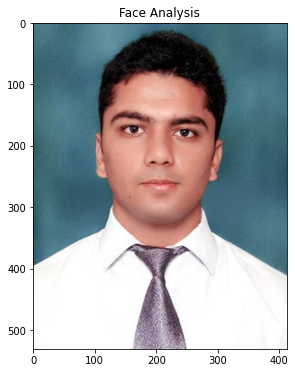

{   'age': 27,
    'dominant_emotion': 'neutral',
    'dominant_race': 'latino hispanic',
    'emotion': {   'angry': 0.09406331206676734,
                   'disgust': 2.149132355936876e-13,
                   'fear': 0.5913338976403414,
                   'happy': 2.005278507308328e-07,
                   'neutral': 79.55348369797967,
                   'sad': 19.760989830552926,
                   'surprise': 0.00012851290505043085},
    'gender': 'Man',
    'race': {   'asian': 5.747383087873459,
                'black': 3.8450170308351517,
                'indian': 15.316049754619598,
                'latino hispanic': 37.124910950660706,
                'middle eastern': 22.42855876684189,
                'white': 15.538081526756287},
    'region': {'h': 208, 'w': 208, 'x': 104, 'y': 96}}


In [9]:
from deepface import DeepFace
import pprint

img_path = "./face_recognition/people/sahil.jpg"
image = cv2.imread(img_path)

obj = DeepFace.analyze(img_path = img_path,
                       actions = ['age', 'gender', 'race', 'emotion'])
imshow("Face Analysis", image)
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(obj)

#### **Create a simple function to display our results on the image**

In [10]:
import cv2

def drawFace(img_path, obj):
  image = cv2.imread(img_path)
  x = obj['region']['x'] 
  y = obj['region']['y'] 
  h = obj['region']['h'] 
  w = obj['region']['w'] 
  age = obj['age']
  gender = obj['gender']
  gender = 'F' if gender == 'Woman' else 'M'
  dominant_emotion = obj['dominant_emotion']
  dominant_race = obj['dominant_race']
  dominant_emotion = obj['dominant_emotion']
  description = f'{age}{gender} - {dominant_emotion}'
  cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
  cv2.putText(image, description, (x,y-10) , cv2.FONT_HERSHEY_PLAIN,2, (0,255,0), 3)
  cv2.putText(image, dominant_race, (x,y+h+30) , cv2.FONT_HERSHEY_PLAIN,2, (0,255,0), 3)
  imshow("Face Analysis", image)

#### **Test on another image**

Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  4.26it/s]


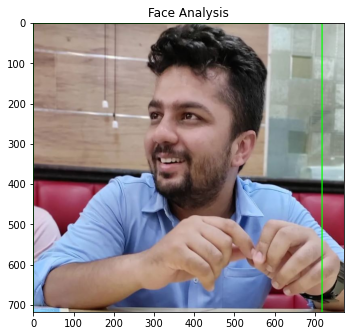

{   'age': 27,
    'dominant_emotion': 'surprise',
    'dominant_race': 'asian',
    'emotion': {   'angry': 0.0034678929544241623,
                   'disgust': 3.8901311159576223e-07,
                   'fear': 23.84324960966406,
                   'happy': 4.649969840047946,
                   'neutral': 2.7130115531689856,
                   'sad': 0.005153871768710942,
                   'surprise': 68.78514699847382},
    'gender': 'Man',
    'race': {   'asian': 71.16513080389088,
                'black': 0.748573893596166,
                'indian': 2.099422118033297,
                'latino hispanic': 12.663235525085659,
                'middle eastern': 2.134752400800729,
                'white': 11.18888474636583},
    'region': {'h': 773, 'w': 718, 'x': 0, 'y': 0}}


In [11]:
from deepface import DeepFace
import pprint

img_path = "/content/sahil1.JPG"
image = cv2.imread(img_path)
obj = DeepFace.analyze(img_path = img_path, enforce_detection=False, actions = ['age', 'gender', 'race', 'emotion'])
drawFace(img_path, obj)
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(obj)

#### **Change backends of face detection**

Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  5.65it/s]


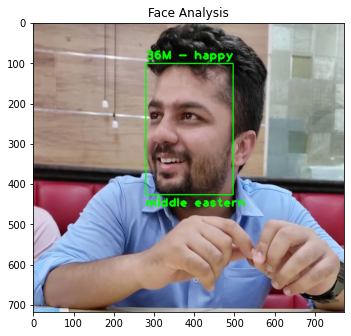

{   'age': 36,
    'dominant_emotion': 'happy',
    'dominant_race': 'middle eastern',
    'emotion': {   'angry': 1.3358588600624965,
                   'disgust': 1.888374509248315e-08,
                   'fear': 2.425325642077694e-05,
                   'happy': 98.65625516697703,
                   'neutral': 0.00130386991177071,
                   'sad': 0.006556497046973908,
                   'surprise': 1.0936861006117783e-10},
    'gender': 'Man',
    'race': {   'asian': 3.473818302154541,
                'black': 2.1557169035077095,
                'indian': 10.969243198633194,
                'latino hispanic': 19.8838010430336,
                'middle eastern': 33.15044343471527,
                'white': 30.36697804927826},
    'region': {'h': 326, 'w': 217, 'x': 280, 'y': 100}}


In [12]:
from deepface import DeepFace

# backends = ['opencv', 'ssd', 'dlib', 'mtcnn', 'retinaface']

img_path = "./sahil1.JPG"
image = cv2.imread(img_path)
obj = DeepFace.analyze(img_path = "./sahil1.JPG", actions = ['age', 'gender', 'race', 'emotion'], detector_backend = 'ssd')
drawFace(img_path, obj)
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(obj)

## **4. Perform Facial Similarity**

In [13]:
result  = DeepFace.verify("./face_recognition/people/sahil.jpg", "./sahil1.JPG", enforce_detection=False)
print("Is verified: ", result["verified"])
result

Is verified:  False


{'detector_backend': 'opencv',
 'distance': 0.547974007829438,
 'model': 'VGG-Face',
 'similarity_metric': 'cosine',
 'threshold': 0.4,
 'verified': False}

### **We can even use different Distance Metrics**

In [14]:
#metrics = ["cosine", "euclidean", "euclidean_l2"]

result  = DeepFace.verify("./face_recognition/people/sahil.jpg", "./sahil1.JPG", enforce_detection=False, distance_metric = 'euclidean')
print("Is verified: ", result["verified"])
result

Is verified:  True


{'detector_backend': 'opencv',
 'distance': 0.4699482783284499,
 'model': 'VGG-Face',
 'similarity_metric': 'euclidean',
 'threshold': 0.6,
 'verified': True}

In [15]:
#metrics = ["cosine", "euclidean", "euclidean_l2"]

result  = DeepFace.verify("./face_recognition/people/sahil.jpg", "./sahil1.JPG", enforce_detection=False, distance_metric = 'euclidean_l2')
print("Is verified: ", result["verified"])
result

Is verified:  False


{'detector_backend': 'opencv',
 'distance': 1.0468753582250736,
 'model': 'VGG-Face',
 'similarity_metric': 'euclidean_l2',
 'threshold': 0.86,
 'verified': False}

### **Download models as the existing DeepFace downloader has stopped working**

In [16]:
!gdown --id 1OdJNKL85CCYStVi9XtJRpHhXo2FU6Gf1
!gdown --id 1GWIuvW3Vm3wMpGGEyTT7sU-c1cVWZIEc
!mv vgg_face_weights.h5 /root/.deepface/weights/vgg_face_weights.h5
!mv facenet_weights.h5 /root/.deepface/weights/facenet_weights.h5

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1OdJNKL85CCYStVi9XtJRpHhXo2FU6Gf1
To: /content/vgg_face_weights.h5
100% 580M/580M [00:03<00:00, 145MB/s] 
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1GWIuvW3Vm3wMpGGEyTT7sU-c1cVWZIEc
To: /content/facenet_weights.h5
100% 92.2M/92.2M [00:01<00:00, 70.3MB/s]


## **5. Perform Facial Recognition**

In [17]:
from deepface import DeepFace
import pandas as pd

df = DeepFace.find(img_path = "./face_recognition/training_faces/Nidia_1.jpg", db_path = './face_recognition/training_faces/', detector_backend = 'ssd')
df

There are  9  representations found in  representations_vgg_face.pkl
find function lasts  0.48192930221557617  seconds


,identity,VGG-Face_cosine
0,./face_recognition/training_faces//Nidia_1.jpg,3.330669e-16
1,./face_recognition/training_faces//Nidia_4.jpg,1.512379e-01
2,./face_recognition/training_faces//Nidia_5.jpg,2.411931e-01
3,./face_recognition/training_faces//Nidia_3.jpg,2.667583e-01
4,./face_recognition/training_faces//Nidia_2.jpg,2.853284e-01
5,./face_recognition/training_faces//Nidia_6.jpg,2.862195e-01
6,./face_recognition/training_faces//jlo.jpg,3.823355e-01


## **We can even try a few different models**

In [18]:
from deepface import DeepFace
import pandas as pd

dfs = []
models = ["VGG-Face", "Facenet", "OpenFace", "DeepFace", "DeepID", "ArcFace", "Dlib"]

for model in models:
   df = DeepFace.find(img_path = "./face_recognition/training_faces/Nidia_1.jpg", db_path = './face_recognition/training_faces/', model_name = model,  detector_backend = 'ssd')
   df['model'] = model
   dfs.append(df)

pd.concat(dfs)

There are  9  representations found in  representations_vgg_face.pkl
find function lasts  0.20751261711120605  seconds
There are  9  representations found in  representations_facenet.pkl
find function lasts  4.594250679016113  seconds
There are  9  representations found in  representations_openface.pkl
find function lasts  2.1865181922912598  seconds
There are  9  representations found in  representations_deepface.pkl
find function lasts  47.76743817329407  seconds
There are  9  representations found in  representations_deepid.pkl
find function lasts  0.5768747329711914  seconds
There are  9  representations found in  representations_arcface.pkl
find function lasts  2.9470300674438477  seconds
There are  9  representations found in  representations_dlib.pkl
find function lasts  3.445496082305908  seconds


,identity,VGG-Face_cosine,model,Facenet_cosine,OpenFace_cosine,DeepFace_cosine,DeepID_cosine,ArcFace_cosine,Dlib_cosine
0,./face_recognition/training_faces//Nidia_1.jpg,3.330669e-16,VGG-Face,NaN,NaN,NaN,NaN,NaN,NaN
1,./face_recognition/training_faces//Nidia_4.jpg,1.512379e-01,VGG-Face,NaN,NaN,NaN,NaN,NaN,NaN
2,./face_recognition/training_faces//Nidia_5.jpg,2.411931e-01,VGG-Face,NaN,NaN,NaN,NaN,NaN,NaN
3,./face_recognition/training_faces//Nidia_3.jpg,2.667583e-01,VGG-Face,NaN,NaN,NaN,NaN,NaN,NaN
4,./face_recognition/training_faces//Nidia_2.jpg,2.853284e-01,VGG-Face,NaN,NaN,NaN,NaN,NaN,NaN
5,./face_recognition/training_faces//Nidia_6.jpg,2.862195e-01,VGG-Face,NaN,NaN,NaN,NaN,NaN,NaN
6,./face_recognition/training_faces//jlo.jpg,3.823355e-01,VGG-Face,NaN,NaN,NaN,NaN,NaN,NaN
0,./face_recognition/training_faces//Nidia_1.jpg,NaN,Facenet,-4.440892e-16,NaN,NaN,NaN,NaN,NaN
1,./face_recognition/training_faces//Nidia_4.jpg,NaN,Facenet,2.764054e-01,NaN,NaN,NaN,NaN,NaN
2,./face_recognition/training_faces//Nidia_5.jpg,NaN,Facenet,3.012673e-01,NaN,NaN,NaN,NaN,NaN


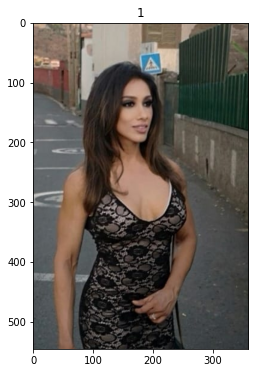

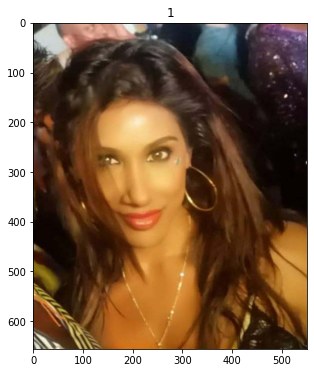

In [19]:
imshow('1', cv2.imread('./face_recognition/training_faces/Nidia_1.jpg'))
imshow('1', cv2.imread('./face_recognition/training_faces/Nidia_5.jpg'))

End of Code